# Problema del commesso viaggatore (TSP)

## Definizione
### Dato un grafo $G(V,A)$ a cui è associato un costo $d_{ij}$ ad ogni arco $(i,j) \in A$. Il problema del commesso viaggiatore consiste nel cercare il circuito Hamiltoniano di costo minimo.
### - Un ciclo Hamiltoniano è un ciclo che attraversa tutti i nodi del grafo una ed una sola volta.
### - Il costo di un ciclo Hamiltoniano è dato dalla somma dei costi degli archi che lo compongono.

## Definizione

## Variabili di decisione

### $x_{ij} \quad (i,j) \in A $ - variabile binaria uguale a $1$ se l'arco $(i,j)$ appartiene al circuito hamiltoniano, 0 altrimenti.


## Funzione obiettivo
### Minimizza il costo totale del circuito hamiltoniano

\begin{equation}
\text{Min} \quad Z = \sum_{(i,j) \in A} d_{ij} \cdot x_{ij}
\end{equation}

## Vincoli di assegnamento
### In una soluzione ammissibile (circuito hamiltoniano) ogni nodo deve avere esattamente un arco entrante ed esattamente un arco uscente.

\begin{equation}
\sum_{i \in V, \ i \neq j} x_{ij} = 1 \quad \quad j \in V 
\end{equation}

\begin{equation}
\sum_{i \in V, \ i \neq j} x_{ji} = 1 \quad \quad j \in V 
\end{equation}

## Vincoli di assenza di sottogiri 
### In una soluzione ammissibile (circuito hamiltoniano) non ci possono essere cicli su un sottoinsime proprio dell'insieme dei nodi $V$.

### Nuovo insieme di varibili
### $u_{i} \quad i \in V $ - variabile binaria indicante l'ordine di visita del vertice $i$

### Vincoli che definiscono l'ordine di visita di un nodo in funzione delle varibili $x_{ij}$

\begin{align}
&u_1 = 0 & \quad \quad \quad \\
&u_j - u_i \geq 1 - n(1-x_{ij}) & \quad \quad  i,j \in V, \ i\neq j, \ j \neq 1
\end{align}

## Istanza

### Legge il file in input e crea il dizionario *Nodes* con chiave *nome del nodo* e valore *coordinate del nodo*

In [1]:
import numpy as np # linear algebra

Nodes = {}

fileName = "att48"
file = open(fileName + ".tsp", "r")

line = file.readlines()
rowInd = 0
while not line[rowInd].startswith("EOF"):
    
    if line[rowInd].startswith("DIMENSION") :
        NumNodes = int(line[rowInd].split()[1])
        rowInd =  rowInd + 1
    elif line[rowInd].startswith("NODE_COORD_SECTION") :
        rowInd =  rowInd + 1
        for i in range(NumNodes):
            Nodes[int(line[rowInd].split()[0])] = (float(line[rowInd].split()[1]), int(line[rowInd].split()[2]))
            rowInd = rowInd + 1
    else:    
        rowInd =  rowInd + 1

### Crea il dizionario Dist con chiave *(i,j)* e valore la distanza euclidea

In [2]:
import math

Dist = {}
for i in range(1, NumNodes + 1) :
    for j in range(1, NumNodes + 1):
        if i != j :
            diffx = Nodes[i][0]-Nodes[j][0]
            diffy = Nodes[i][1]-Nodes[j][1]
            Dist[(i,j)] = math.sqrt(diffx**2 + diffy**2)
            

## Importa la libreria GRB inizializza il problema e definisce le variabili

In [3]:
import gurobipy as gp
from gurobipy import GRB

import numpy as np

# Inizializza il modelo
mod = gp.Model('TSP')

# Crea le varibili di decisione
Xvars = mod.addVars(Dist.keys(), obj=Dist, vtype=GRB.BINARY, name='x')

Set parameter Username
Academic license - for non-commercial use only - expires 2026-01-14


## Vincoli di assegnamento

In [4]:
outstar = mod.addConstrs(Xvars.sum(i, '*') == 1 for i  in Nodes)

instar = mod.addConstrs(Xvars.sum('*', i) == 1 for i  in Nodes)

## Vincoli di posizione

In [5]:
# Crea le varibili di posizione
Uvars = mod.addVars(Nodes, obj=0.0, lb = 1, ub = NumNodes, vtype=GRB.INTEGER, name='u')

In [6]:
PositioneIniziale = mod.addConstr(Uvars[1] == 1)

In [7]:
PositionAltriNodi = mod.addConstrs(Uvars[j] - Uvars[i] - int(NumNodes)*Xvars[i,j] >= 1 - int(NumNodes) 
                                   for i in Nodes for j in Nodes if i != j and j != 1)    

## Risolve il modello

In [8]:
mod.setParam("TimeLimit", 60)
mod.optimize()

Set parameter TimeLimit to value 60
Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (win64 - Windows 11+.0 (22631.2))

CPU model: 13th Gen Intel(R) Core(TM) i9-13900H, instruction set [SSE2|AVX|AVX2]
Thread count: 14 physical cores, 20 logical processors, using up to 20 threads

Optimize a model with 2305 rows, 2304 columns and 11139 nonzeros
Model fingerprint: 0x22e4d04f
Variable types: 0 continuous, 2304 integer (2256 binary)
Coefficient statistics:
  Matrix range     [1e+00, 5e+01]
  Objective range  [1e+02, 8e+03]
  Bounds range     [1e+00, 5e+01]
  RHS range        [1e+00, 5e+01]
Presolve removed 0 rows and 1 columns
Presolve time: 0.02s
Presolved: 2305 rows, 2303 columns, 11092 nonzeros
Variable types: 0 continuous, 2303 integer (2256 binary)
Found heuristic solution: objective 159721.94480
Found heuristic solution: objective 155223.40822

Root relaxation: objective 2.675873e+04, 163 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bo

## Preleva la soluzione e crea una lista *sortedPos* che contiene le posizioni dei nodi nel tour 

In [9]:
Xvals = mod.getAttr('x', Xvars)
Uvals = mod.getAttr('x', Uvars)

for (i,j) in Xvals:
    if Xvals[i,j] >= 0.9:
        print("x(",i,",",j,") = ",Xvals[i,j])

sortedPos = list(sorted(Uvals, key=Uvals.get))
sortedPos

x( 1 , 9 ) =  1.0
x( 2 , 26 ) =  1.0
x( 3 , 22 ) =  1.0
x( 4 , 35 ) =  1.0
x( 5 , 48 ) =  1.0
x( 6 , 28 ) =  1.0
x( 7 , 18 ) =  1.0
x( 8 , 1 ) =  1.0
x( 9 , 40 ) =  1.0
x( 10 , 24 ) =  1.0
x( 11 , 13 ) =  1.0
x( 12 , 11 ) =  1.0
x( 13 , 25 ) =  1.0
x( 14 , 23 ) =  1.0
x( 15 , 12 ) =  1.0
x( 16 , 41 ) =  1.0
x( 17 , 27 ) =  1.0
x( 18 , 44 ) =  1.0
x( 19 , 37 ) =  1.0
x( 20 , 33 ) =  1.0
x( 21 , 47 ) =  1.0
x( 22 , 16 ) =  1.0
x( 23 , 3 ) =  1.0
x( 24 , 42 ) =  1.0
x( 25 , 14 ) =  1.0
x( 26 , 4 ) =  1.0
x( 27 , 19 ) =  1.0
x( 28 , 7 ) =  1.0
x( 29 , 2 ) =  1.0
x( 30 , 43 ) =  1.0
x( 31 , 38 ) =  1.0
x( 32 , 21 ) =  1.0
x( 33 , 46 ) =  1.0
x( 34 , 29 ) =  1.0
x( 35 , 45 ) =  1.0
x( 36 , 30 ) =  1.0
x( 37 , 6 ) =  1.0
x( 38 , 8 ) =  1.0
x( 39 , 32 ) =  1.0
x( 40 , 15 ) =  1.0
x( 41 , 34 ) =  1.0
x( 42 , 5 ) =  1.0
x( 43 , 17 ) =  1.0
x( 44 , 31 ) =  1.0
x( 45 , 10 ) =  1.0
x( 46 , 36 ) =  1.0
x( 47 , 20 ) =  1.0
x( 48 , 39 ) =  1.0


[1,
 9,
 40,
 15,
 12,
 11,
 13,
 25,
 14,
 23,
 3,
 22,
 16,
 41,
 34,
 29,
 2,
 26,
 4,
 35,
 45,
 10,
 24,
 42,
 5,
 48,
 39,
 32,
 21,
 47,
 20,
 33,
 46,
 36,
 30,
 43,
 17,
 27,
 19,
 37,
 6,
 28,
 7,
 18,
 44,
 31,
 38,
 8]

### Didegna la soluzione

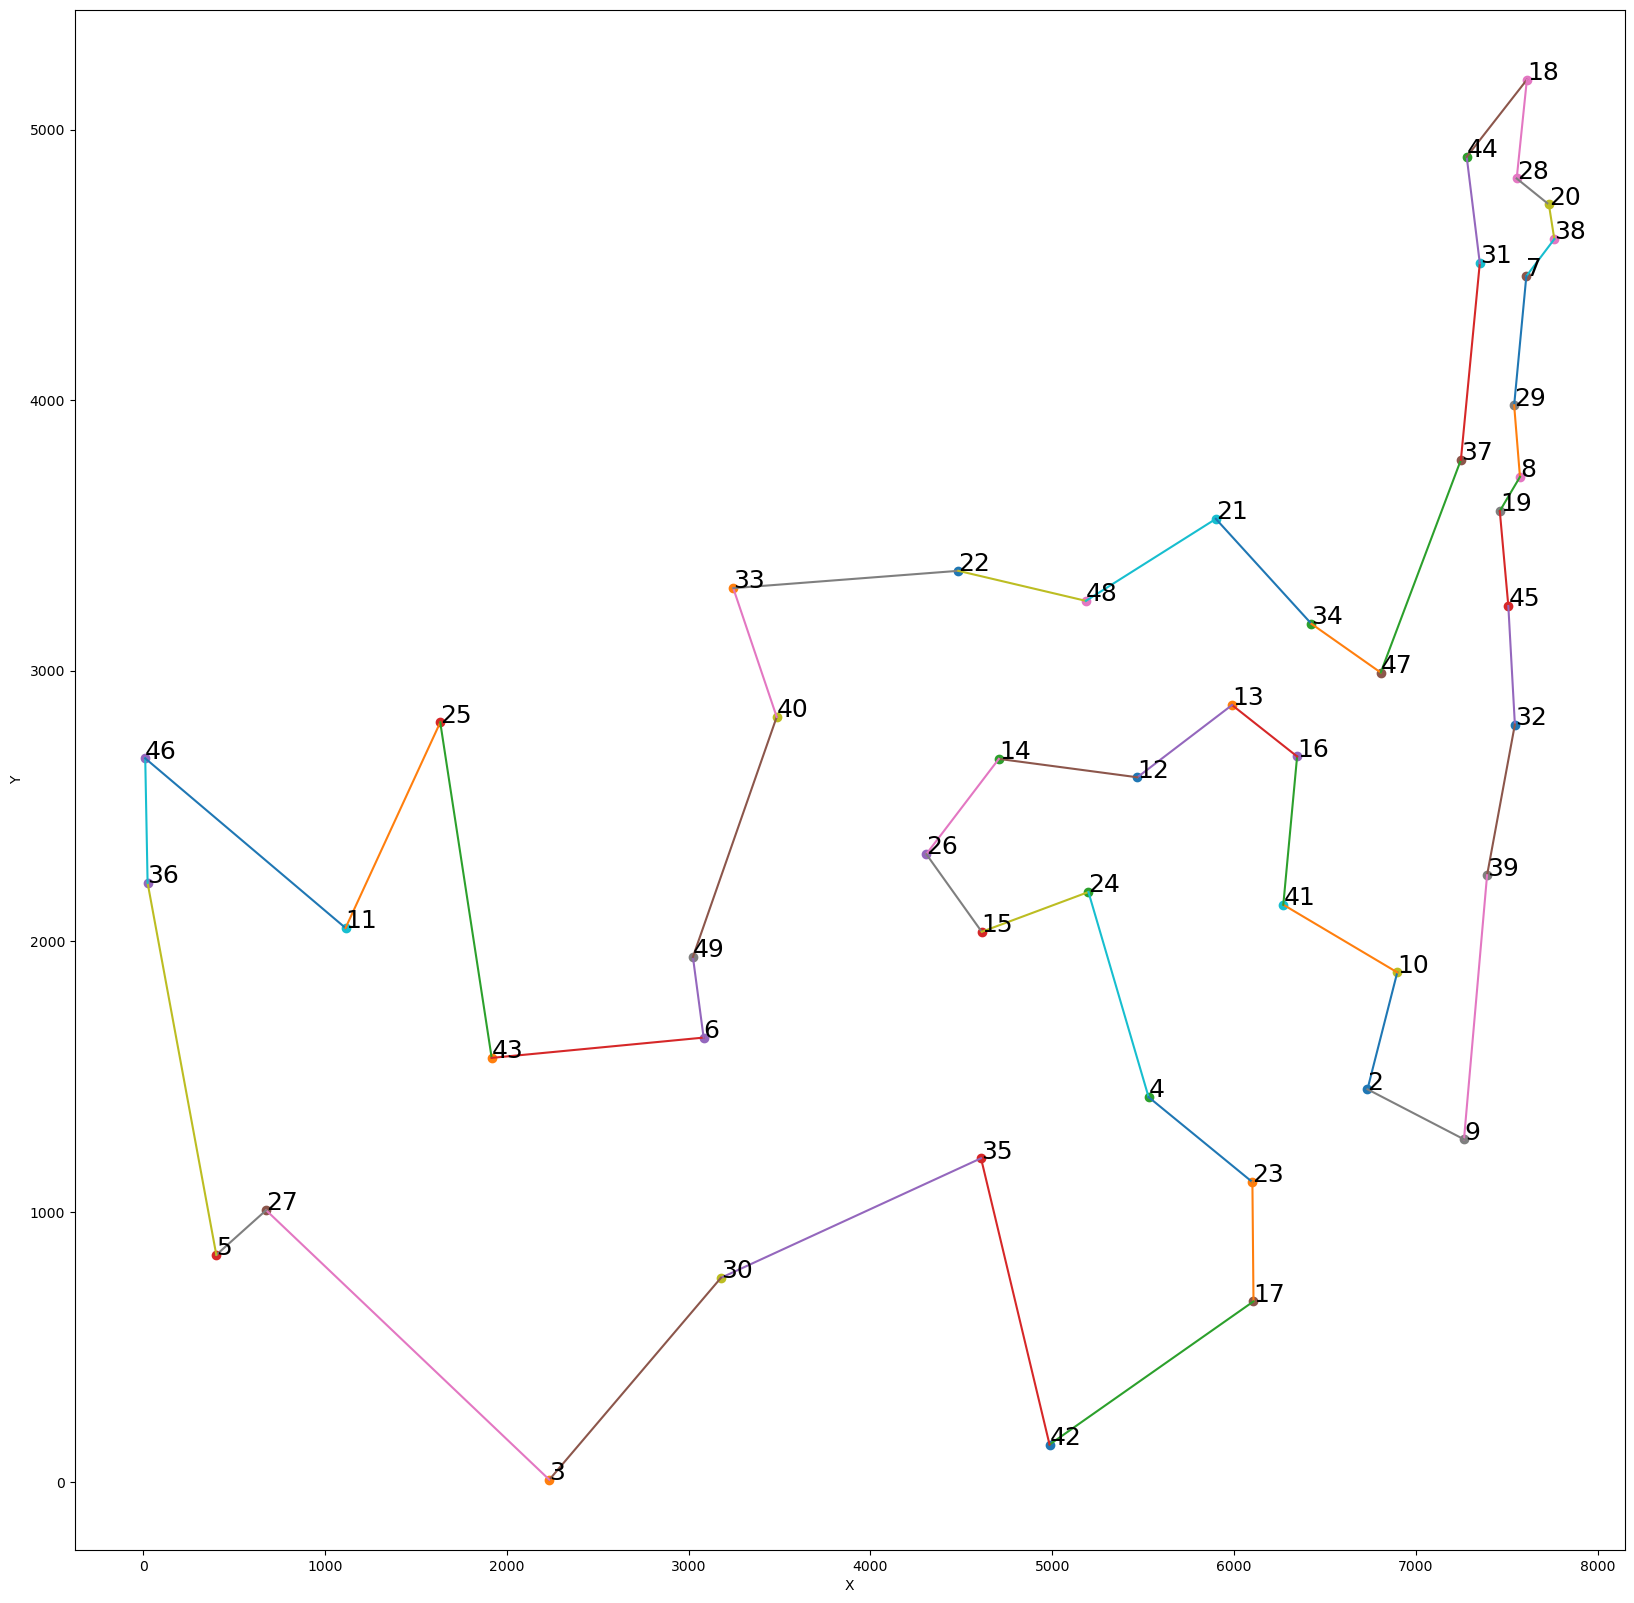

In [10]:
import matplotlib
import matplotlib.pyplot as plt

plt.figure(figsize=(20,20))
for i in Nodes:
    plt.scatter(Nodes[i][0],Nodes[i][1])
    plt.text(Nodes[i][0],Nodes[i][1], str(i+1),fontsize=18)
            
for i in range(NumNodes -1):
      plt.plot([Nodes[sortedPos[i]][0],Nodes[sortedPos[i+1]][0]],
               [Nodes[sortedPos[i]][1],Nodes[sortedPos[i+1]][1]])  
            
plt.plot([Nodes[sortedPos[len(sortedPos)-1]][0],Nodes[sortedPos[0]][0]],
         [Nodes[sortedPos[len(sortedPos)-1]][1],Nodes[sortedPos[0]][1]])
        
plt.xlabel('X');
plt.ylabel('Y');